<a href="https://colab.research.google.com/github/jmohsbeck1/jpmc_mle/blob/data_ananlysis_with_pandas/Univariate_Analysis_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

!pip install openml

import openml


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
titanic_data = openml.datasets.get_dataset(40945)

type(titanic_data)
#df = pd.read_csv('titanic.csv')
#df = pd.DataFrame(titanic_data)

openml.datasets.dataset.OpenMLDataset

In [3]:
# Get the data and target separately
X, y, _, _ = titanic_data.get_data(target=titanic_data.default_target_attribute)

In [4]:
# Get the feature names from the Titanic dataset
attribute_names = titanic_data.features.values()
feature_names = [feat.name for feat in attribute_names if feat.name != titanic_data.default_target_attribute]

In [5]:
df = pd.DataFrame(X, columns=feature_names)

In [6]:
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,None,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
df.describe()

,pclass,age,sibsp,parch,fare,body
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   pclass     1309 non-null   uint8   
 1   name       1309 non-null   object  
 2   sex        1309 non-null   category
 3   age        1309 non-null   float64 
 4   sibsp      1309 non-null   uint8   
 5   parch      1309 non-null   uint8   
 6   ticket     1309 non-null   object  
 7   fare       1309 non-null   float64 
 8   cabin      1309 non-null   object  
 9   embarked   1307 non-null   category
 10  boat       1309 non-null   object  
 11  body       1309 non-null   float64 
 12  home.dest  1309 non-null   object  
dtypes: category(2), float64(3), object(5), uint8(3)
memory usage: 88.6+ KB


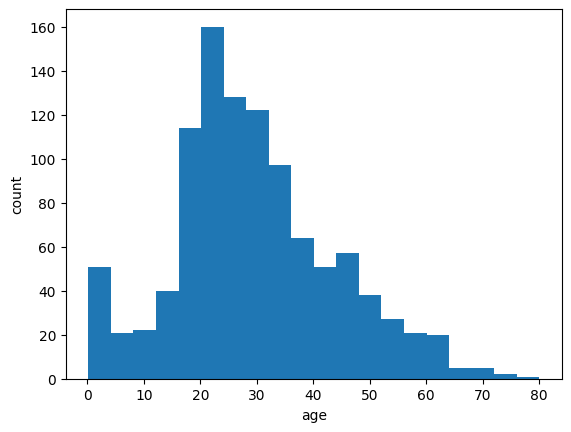

In [7]:
plt.hist(df['age'], bins=20)

plt.xlabel('age')

plt.ylabel('count')

plt.show()

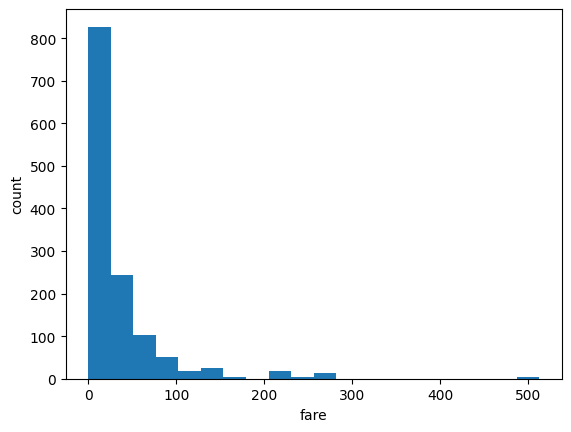

In [8]:
plt.hist(df['fare'], bins=20)

plt.xlabel('fare')

plt.ylabel('count')

plt.show()

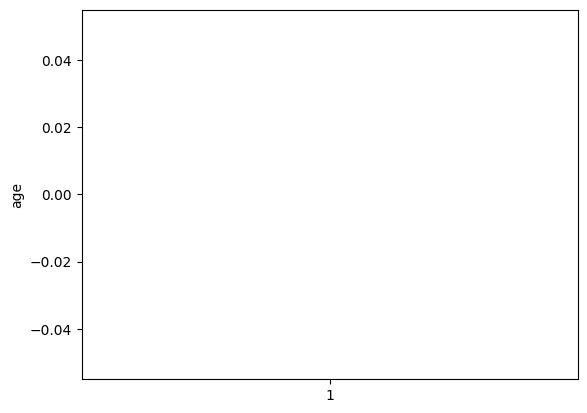

In [11]:
plt.boxplot(df['age'])

plt.ylabel('age')

plt.show()

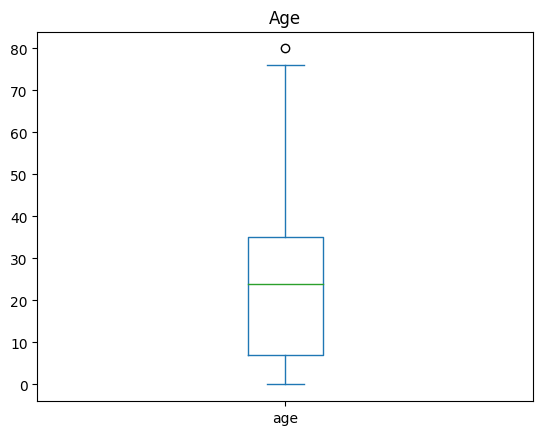

In [19]:
df['age'].plot(kind='box', title='Age')
plt.show()

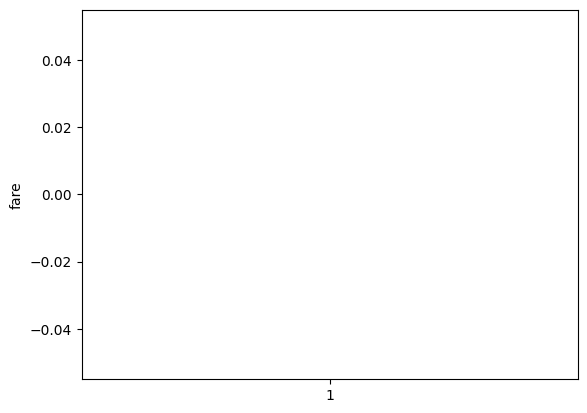

In [12]:
plt.boxplot(df['fare'])

plt.ylabel('fare')

plt.show()

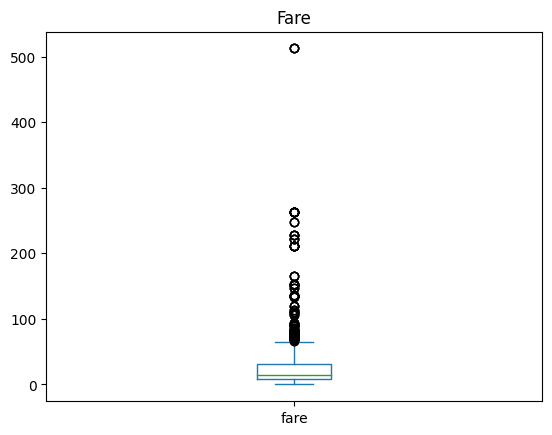

In [20]:
df['fare'].plot(kind='box', title='Fare')
plt.show()

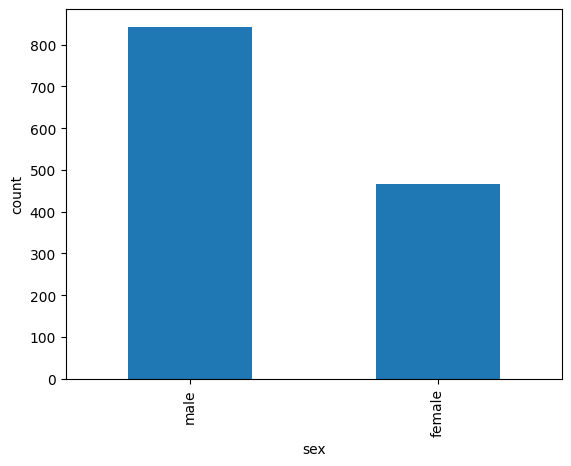

In [21]:
counts = df['sex'].value_counts()

counts.plot(kind='bar')

plt.xlabel('sex')

plt.ylabel('count')

plt.show()

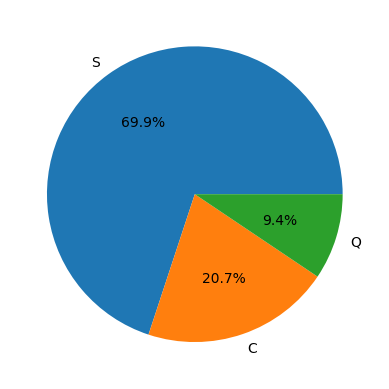

In [23]:
counts = df['embarked'].value_counts()

counts.plot(kind='pie', autopct='%1.1f%%')

plt.ylabel('')

plt.show()

In [24]:
freq_table = pd.crosstab(index=df['embarked'], columns='count')

freq_table['percentage'] = freq_table['count'] / len(df) * 100

print(freq_table)

col_0     count  percentage
embarked                   
C           270   20.626432
Q           123    9.396486
S           914   69.824293


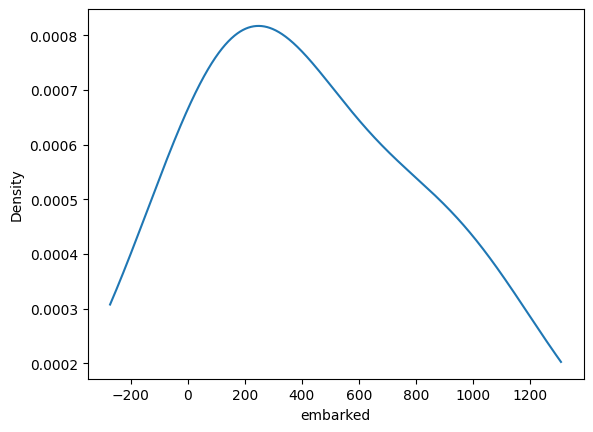

In [25]:
df['embarked'].value_counts().plot(kind='density')

plt.xlabel('embarked')

plt.show()